# Midterm 
## NLP Fall 2022
Some selected solutions that can be calculated with Python

In [14]:
import seaborn as sns
from scipy.spatial.distance import cosine, squareform, pdist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
vectors = [[4, 1, 70], [40, 3, 0], [51, 40, 63], [25, 19, 32], [50, 1, 7], [1, 4, 30]]

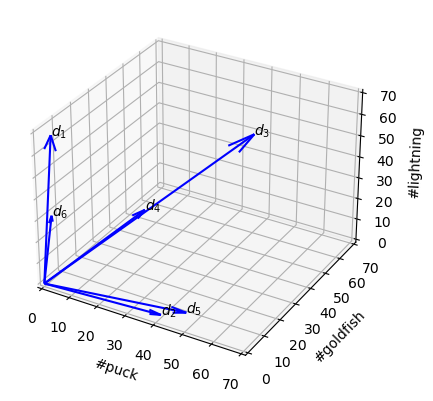

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(len(vectors)):
    ax.text(*vectors[i], "$d_%s$"%(i+1))
ax.quiver(X, Y, Z, U, V, W, color='blue', arrow_length_ratio=.1) #, arrow_length_ratio=0.1)
ax.set_xlim([0, 70])
ax.set_ylim([0, 70])
ax.set_zlim([0, 70])
ax.set_xlabel("#puck")
ax.set_ylabel("#goldfish")
ax.set_zlabel('#lightning')
plt.show()


### Term-document matrix

Generally, cosine is a function from $\mathbb{R} \rightarrow [-1, 1]$. Argue, why in the context of document vectors $u$ and $v$, the cosine as well as the cosine distance are always positive.

In [11]:
## data framing ;-)
idx = ["d%i"%(i+1) for i in range(len(vectors))]

wdm = pd.DataFrame(vectors, columns='puck goldfish lightning'.split(), index=idx)
wdm.T

,d1,d2,d3,d4,d5,d6
puck,4,40,51,25,50,1
goldfish,1,3,40,19,1,4
lightning,70,0,63,32,7,30


### Cosine Similarity
We can compute the Cosine similarity between one-dimensional vectors. It is defined as such:

  $cos(u, v) = \frac{u \cdot v}
              {||u||_2 ||v||_2} = 
              \frac{\sum_{i=1}^{d}u_{i}v_i}
                   {\sqrt{\sum_{i=1}^{d}u_i^2  }   \sqrt{\sum_{i=1}^{d}v_i^2  }}$
                   
We can turn this into a distance measure:

  $cosd(u, v) = 1 - \frac{u \cdot v}
              {||u||_2 ||v||_2} = 
              1 - \frac{\sum_{i=1}^{d}u_{i}v_i}
                   {\sqrt{\sum_{i=1}^{d}u_i^2  }   \sqrt{\sum_{i=1}^{d}v_i^2  }}$

<AxesSubplot:>

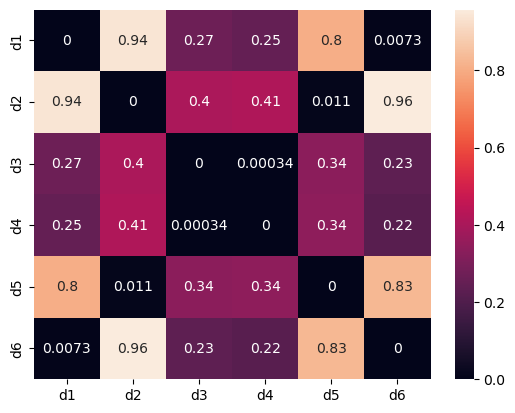

In [15]:
allVsall = squareform(pdist(wdm, cosine))
allVsall.shape
dm = pd.DataFrame(allVsall, index=wdm.index, columns=wdm.index)
sns.heatmap(dm, annot=True)

In [20]:
1-dm.d1.d5

0.19514519084919946

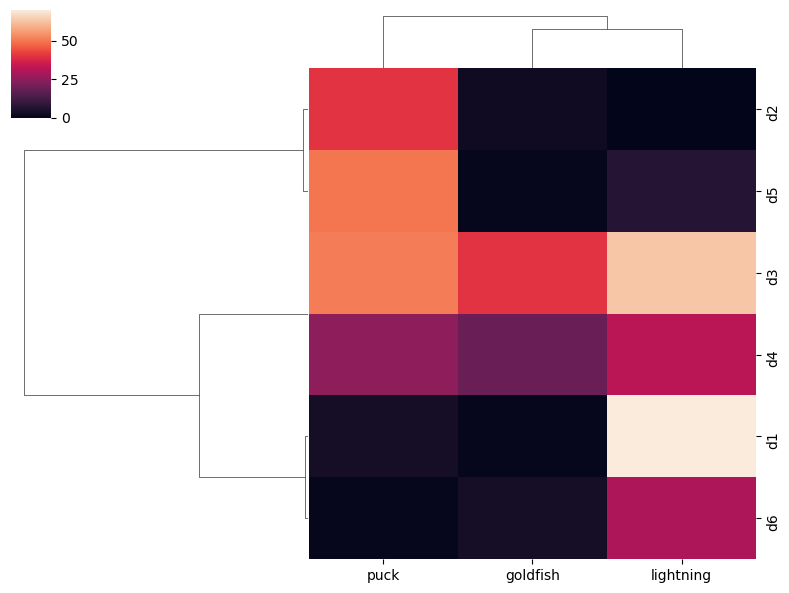

In [177]:
sns.clustermap(wdm, metric=cosine, dendrogram_ratio=(0.4, 0.1), figsize=(8,6))

In [166]:
sns.clustermap?

## Word Embeddings

### Capturing semantics

Vector representations (embeddings) can capture word meaning (semantics), such as synonyms, because:

* vectors as used for word embeddings are one-hot encodings and can therefore represent every term of the document
* vectors for similar terms have similar contexts, which cause the vectors to be close (in terms of the cosine similarity)
* vectors can't capture meaning, they are just floating point numbers

### Analogy
The parallelogram test as discussed during the course can help to identify analogies, like what Paris is to France, is Berlin to Germany. Shortly(!) explain, how this works.

### The odd one out
Vector models like those available in gensim have a function to identify the odd one out, called `doesnt_match`:

`> model.doesnt_match('manchester city,liverpool,arsenal,barcelona'.split(','))
arsenal`

Check which of the options is true:

* The words are compared using the Edit-distance.
* The corresponding embeddings are compared using cosine distance, the outlier is reported.
* The n-dimensional vector representations (embeddings) are passed through softmax, the lowest value is the odd one out.

#### Solution
Regarding the odd-one-out question, arsenal is commonly contextualized with words like 'fantastic', 'stellar', 'other-worldly', 'top'. In contrast, the context of all other 'terms' are frequently contains 'mediocre', 'mid-table', 'boring' and 'financial-fair-play-violation'. Well, let the facts speak for themselves:

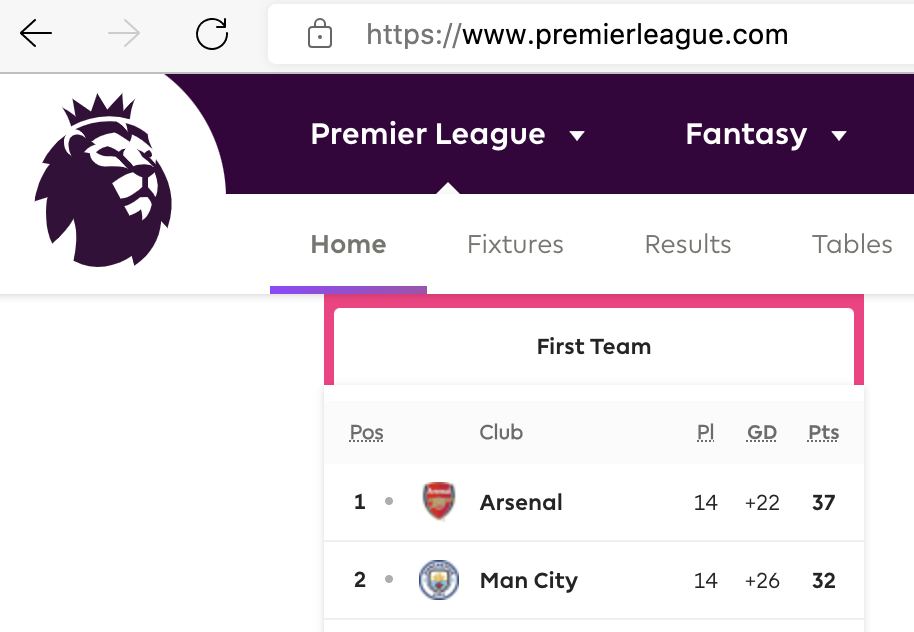

## Edit distance

The details of the edit distance algorithm are provided below:
![image.png](attachment:image.png)
and 
![image-2.png](attachment:image-2.png)

Imagine, the algorithm is running though the nested for-loop and is assigning values to $D[i, j]$.
Consider the following scenarios and fill in the last column of the table below.

source[i]| target[j] | D[i-1,j-1]|D[i-1,j]|D[i,j-1]|D[i,j]
---|---|---|---|---|---
k|s|0|1|1|2
t|t|4|5|3|4
n|n|4|5|5|4
n|k|5|6|6|7


`    s i t t i n g
 [[0 1 2 3 4 5 6 7]
k [1 2 3 4 5 6 7 8]
i [2 3 2 3 4 5 6 7]
t [3 4 3 2 3 4 5 6]
t [4 5 4 3 2 3 4 5]
e [5 6 5 4 3 4 5 6]
n [6 7 6 5 4 5 4 5]]`

### Edit distance, continued
Consider two very similar words like DRIVE and DIVE, which just requires a single edit, hence the Dynamic Programming matrix $D$ is of size $6\times 5$ and $D_{6,5}$ = 1. If now n letters not occuring in either word are added to DIVE, what would be the value of $D_{6,5+n}$? 

### 3-way edit distance (bonus)
If you were given three words, design an algorithm to determine the minimal amount of necessary edits, to make all three equal.

True or False?

* Edit distance can be used to detect spelling mistakes
* Edit distance is an appropriate measure to quantify word similarity
* Tokenization is the process of assigning frequencies
* In classification tasks, the loss function quantifies how far the prediction is from the true labels.
* Naïve Bayesian can not be used to for spam detection.
* The loss function quantifies the difference between the input and the output. 
* Gradient descent in Logistic regression is used to adjust weights, in order to minimize the loss. 
* A learning rate of 0 in the Gradient Descent algorithm will result in unchanged weights.

## N-Grams
Recall that $P(w_n|w_{1:n-1})\approx P(w_n|w_{n-N+1:n-1})$.

Express how you would estimate the probability for a 4-gram, given a very large corpus (formulate in terms of counts).

$$P(w_4|w_1,w_2,w_3)=\frac{\text{something to count here}}{\text{something else to count here}}$$

$$P(w_4|w_1,w_2,w_3)=\frac{c(w_1,w_2,w_3,w_4)}{c(w_1,w_2,w_3)}$$

## TF-IDF
Recall that tf-idf is defined like so

$w_{t,d} = \mathit{tf}_{t,d} \times \mathit{idf}_t $

$ = \mathit{log}_{10}(\mathit{count}(t,d) + 1) \times  \mathit{log}_{10}(\frac{N}{\mathit{df}_t})$

Calculate the TF-IDF for the below Term-Document matrix. The provided Python code can give further clues about the calculation.
You can substantially speed up the TF-IDF calculation by identifying those cells that will be 0. So, argue, which cells will be 0, and give a very brief reason.

In [21]:
idx = ['glaciology', 'paleontology', 'biology']
terms = ['bariometric', 'measure', 'australopethicus']
tdm = pd.DataFrame([[5,5,0],[2,1,4],[0,6,0]], index=idx, columns = terms).T
tdm

,glaciology,paleontology,biology
bariometric,5,2,0
measure,5,1,6
australopethicus,0,4,0


In [45]:
def tfidf(row): ## row is a pandas series
    tf = np.log10(row+1)  ## term frequency    
    N = len(row)          ## Number of documents
    dft = len(row[row>0]) ## document frequency
    idf = np.log10(N/dft) ## inverse df
    return tf*idf

In [46]:
pd.DataFrame([tfidf(row) for i, row in tdm.iterrows()])

,glaciology,paleontology,biology
bariometric,0.137026,0.084017,0.0
measure,0.000000,0.000000,0.0
australopethicus,0.000000,0.333493,0.0


In [ ]:
np.log10(v)

In [29]:
row = tdm.iloc[0]
row

glaciology      5
paleontology    2
biology         0
Name: bariometric, dtype: int64

In [30]:
dft = len(row[row>0])
dft

2

In [31]:
N = len(row)
idf = np.log10(N/dft) 
idf

0.17609125905568124

In [32]:
tf = np.log10(row+1)
tf

glaciology      0.778151
paleontology    0.477121
biology         0.000000
Name: bariometric, dtype: float64

In [33]:
tf*idf

glaciology      0.137026
paleontology    0.084017
biology         0.000000
Name: bariometric, dtype: float64

## Edit distance

In [19]:
from numpy import zeros, arange, argmin

def dp(v,w, delta, gap=1):
    n = len(v)
    m = len(w)
    D = zeros((n+1, m+1), dtype=int)
    b = zeros((n+1, m+1), dtype=int)
    b[0,1:] = 1

    D[0] = arange(m+1) * gap
    D[:,0] = arange(n+1) * gap
    for i in range(1,n+1):
        for j in range(1,m+1):
            options = [D[i-1,j] + gap,
                       D[i,j-1] + gap,
                       D[i-1,j-1] + delta(v[i-1], w[j-1])
                       ]
            bestOption = argmin(options) # only considers one best option, breaks ties randomly, kind of
            D[i,j] = options[bestOption]
            b[i,j] = bestOption # better to note down all
    return D,b

def printAlignment(v,w,b):
    print (b, b.shape, b.shape==(0,0))
    ## 0 stands for coming from N
    ## 1 stands for coming from W
    ## 2 stands for coming from NW, ie. either mismatch or match,
    ## Your code here
    return

def delta(a, b, matchscore=0, mismatch=2):
    if a==b: return matchscore
    else: return mismatch

D,b = dp('kitten', 'sitting', delta, gap=1)
print(D)

[[0 1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7 8]
 [2 3 2 3 4 5 6 7]
 [3 4 3 2 3 4 5 6]
 [4 5 4 3 2 3 4 5]
 [5 6 5 4 3 4 5 6]
 [6 7 6 5 4 5 4 5]]


In [ ]:
"""
     s i t t i n g
 [[0 1 2 3 4 5 6 7]
k [1<2>3 4 5 6 7 8]
i [2 3 2 3 4 5 6 7]
t [3 4 3 2 3 4 5 6]
t [4 5 4 3 2 3 4 5]
e [5 6 5 4 3 4 5 6]
n [6 7 6 5 4 5 4 5]]"""

In [50]:
import re
re.match("^d[o|0]l{2,}ar(s$)?", 'd|lllar$')

<re.Match object; span=(0, 7), match='d|lllar'>

In [42]:
201+490

691

In [44]:
691/((17+70*70) * (50**2+1+49))

5.511091969836542e-05